We implemented our analytic method in the Python script `Majorana.py`.
The whole method utilizes the well-known transformation between spin-`1/2` Bosons and spinless fermions, Jordan-Wigner transformation;
a slight difference is that we skipped the intermediate fermionic system and jumped directly into the Majorana modes, which is the reason why I called this `Majorana`.

<!-- However, to make sure that this method yields correct answers, we also need to compare it with the fDMRG. -->

# Comparison between efficiencies of two different methods to get the eigenvalues of $M$

In [1]:
from Majorana import get_Majorana_spectrum, get_two_E

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [3]:
Jx = 1.75
Jy = 0.25
Jz = 1.0
N = 20
D_list = [1 for i in range(2*N)]
bc = 'open'
SigmaY = 1

In [4]:
repeat = 1000

for method in ['iM', 'M2']:
    begin = time()
    
    for rep in range(repeat):
        get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list, bc, method=method)
    
    end = time()
    print(f'Time elapsed for {method}: {end - begin}')

Time elapsed for iM: 0.39957523345947266
Time elapsed for M2: 0.22156143188476562


So apparently the better one will be `M2`.

# Different `D`'s energies

Text(0, 0.5, 'Energy')

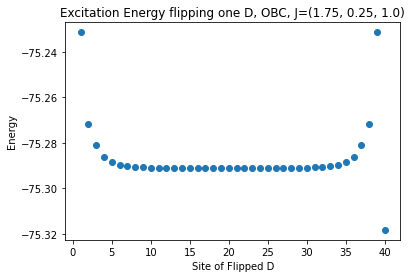

In [5]:

D_list = [1 for i in range(2*N)]

E_list = []

for i in range(2*N):
    D_list_1 = D_list.copy()
    D_list_1[i] *= -1
    E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
    E_list.append(E)
    
plt.plot(np.arange(1, 2*N+1), E_list, 'o')
plt.title(f'Excitation Energy flipping one D, OBC, J=({Jx}, {Jy}, {Jz})')
plt.xlabel('Site of Flipped D')
plt.ylabel('Energy')

In [6]:
D_list_negative = [-1 for i in range(2*N)]
np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_negative, bc, method='M2'))

-74.29323106188572

# Same `D`, different Majorana excitation, 1-particle

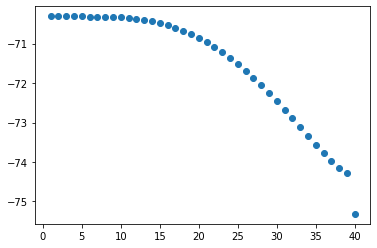

In [7]:
spec = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list, bc, method='M2')
GS = np.sum(spec)
E_list_maj = [GS-2*e for e in spec]
plt.plot(np.arange(1, 2*N+1), E_list_maj, 'o')

So here a significant phenomenon is that the excitations of vortices, i.e. the flipping of $D$'s, have much lower energies than particles.

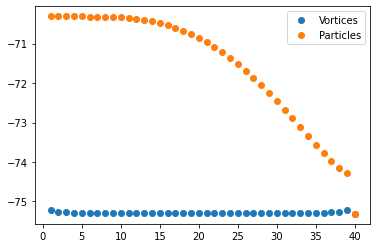

In [8]:
plt.plot(np.arange(1, 2*N+1), E_list,'o', label='Vortices')
plt.plot(np.arange(1, 2*N+1), E_list_maj, 'o', label='Particles')
plt.legend()
plt.show()

Let's try several other phase points.

In [9]:
def compare_vortices_particles_OBC(
    Jx = 1.0,
    Jy = 1.0,
    Jz = 1.0,
    N = 20,
    ):
    D_list = [1 for i in range(2*N)]

    E_list = []

    for i in range(2*N):
        D_list_1 = D_list.copy()
        D_list_1[i] *= -1
        E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
        E_list.append(E)

    plt.plot(np.arange(1, 2*N+1), E_list, 'o')
    plt.title(f'Single Vortices, OBC, J=({Jx}, {Jy}, {Jz})')
    plt.xlabel('Site of Flipped D')
    plt.ylabel('Energy')
    plt.show()

    spec = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list, bc, method='M2')
    GS = np.sum(spec)
    E_list_maj = [GS-2*e for e in spec]
    plt.plot(np.arange(1, 2*N+1), E_list_maj, 'o', color='orange')
    plt.title(f'Single Particles, OBC, J=({Jx}, {Jy}, {Jz})')
    plt.show()

    plt.plot(np.arange(1, 2*N+1), E_list,'o', label='Vortices')
    plt.plot(np.arange(1, 2*N+1), E_list_maj, 'o', color='orange', label='Particles')
    plt.legend()
    plt.show()

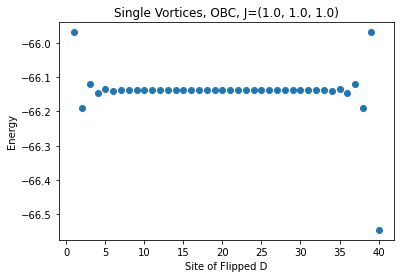

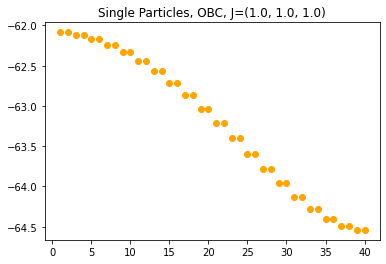

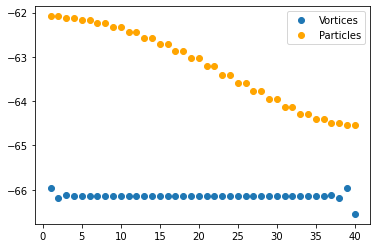

In [10]:
compare_vortices_particles_OBC()

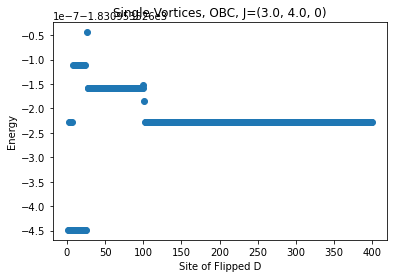

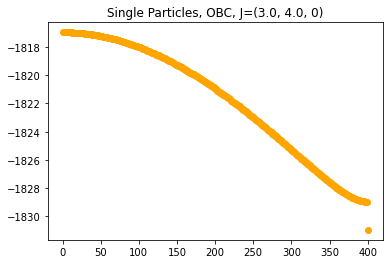

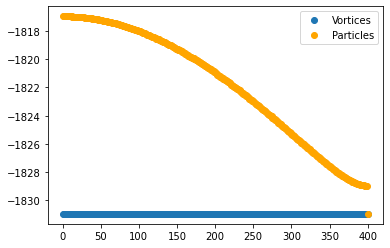

In [11]:
compare_vortices_particles_OBC(
    Jx = 3.0,
    Jy = 4.0,
    Jz = 0,
    N = 200,
)

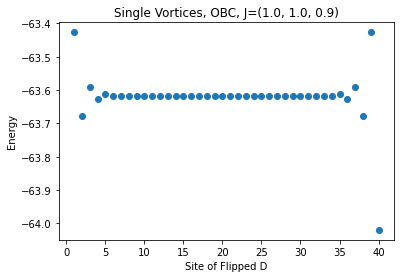

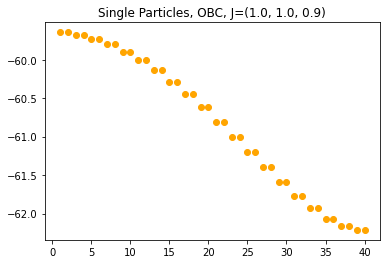

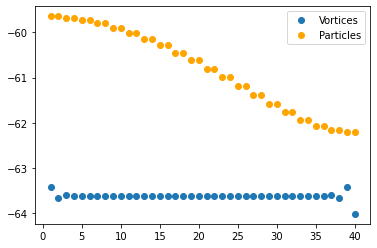

In [12]:
compare_vortices_particles_OBC(
    Jx = 1.0,
    Jy = 1.0,
    Jz = 0.9,
)

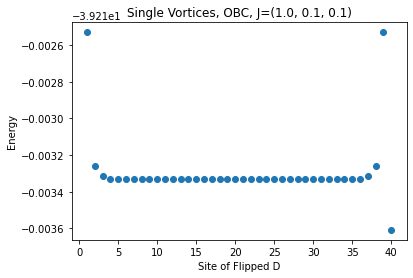

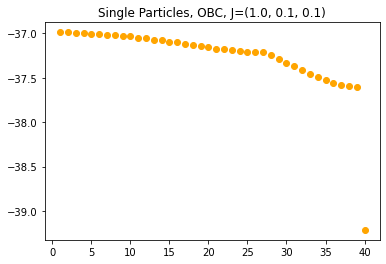

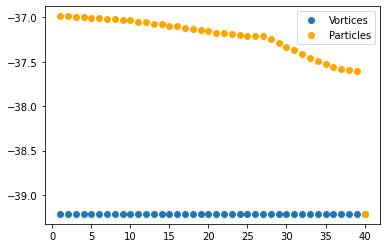

In [13]:
compare_vortices_particles_OBC(
    Jx = 1.0,
    Jy = 0.1,
    Jz = 0.1,
)